In [1]:
import pandas as pd
import numpy as np
import os
# from google.colab import files #匯入套件
# upload = files.upload() #開啟上傳介面並載入


In [2]:
raw_data = pd.read_csv('ck.csv')
print('Subjects:{}, Features:{}'.format(raw_data.shape[0], raw_data.shape[1]))

Subjects:102, Features:23


In [3]:
X_data = raw_data.drop(['No','PAgroup01vs23', 'MTAgroup01vs23', 'GCAgroup12', 'MRI_GCA', 'MRI_MTA', 'MRI_ParietalAtrophy'], axis=1)
y1_data = raw_data[['PAgroup01vs23']]
y2_data = raw_data[['MTAgroup01vs23']]
y3_data = raw_data[['GCAgroup12']]

print(X_data.shape, y1_data.shape, y2_data.shape, y3_data.shape)

(102, 16) (102, 1) (102, 1) (102, 1)


In [4]:
# one-hot
categorical_columns = ['Sarcopenia_AWGS2014','Gender', 'Smoke01', 'Alcohol01', 'Polypharmacy', 'VisualImp', 'HearImp']
X_data_one_hot = pd.get_dummies(X_data, columns=categorical_columns)
# display(X_data_one_hot.head(1))
# print(X_data_one_hot.shape)
# display(y1_data.head(1), y2_data.head(1), y3_data.head(1))
# print(y1_data.shape, y2_data.shape, y3_data.shape)
feature_names = X_data_one_hot.columns.values
print(feature_names)

['Age' 'EduYear' 'BMI' 'CCI' 'MMSE' 'GDS' 'MNA' 'ADL' 'IADL'
 'Sarcopenia_AWGS2014_0' 'Sarcopenia_AWGS2014_1' 'Gender_0' 'Gender_1'
 'Smoke01_0' 'Smoke01_1' 'Alcohol01_0' 'Alcohol01_1' 'Polypharmacy_0'
 'Polypharmacy_1' 'VisualImp_0' 'VisualImp_1' 'HearImp_0' 'HearImp_1']


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import auc, roc_curve
from sklearn import preprocessing

In [6]:
import matplotlib.pyplot as plt
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

PAgroup01vs23 SVM--
auc 0.7333333333333332
auc 0.7526881720430106
auc 0.34615384615384615
auc_mean: 0.61, auc_std: 0.19


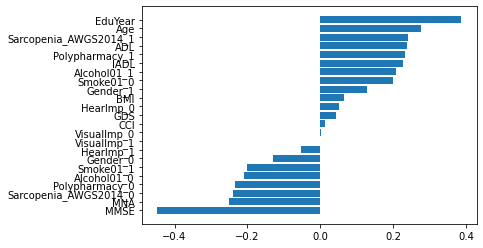

In [7]:
svm_all_auroc = []
avg_coef = []
inx = 0
print('PAgroup01vs23 SVM--')
for train_index, test_index in KFold(n_splits=3, random_state=42, shuffle=True).split(X_data_one_hot):
    X_train, X_test = X_data_one_hot.iloc[train_index], X_data_one_hot.iloc[test_index]
    y_train, y_test = y1_data.iloc[train_index], y1_data.iloc[test_index]
    # scaling
    scaler = preprocessing.MinMaxScaler()
    #scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # model
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    auroc = auc(fpr, tpr)
    print('auc', auroc)
    svm_all_auroc.append(auroc)
    if inx == 0:
        avg_coef = model.coef_[0]
    else:
        avg_coef = np.mean(np.array([ model.coef_[0], avg_coef ]), axis=0)
    inx = inx+1
print('auc_mean: %.2f, auc_std: %.2f' %(np.mean(svm_all_auroc), np.std(svm_all_auroc)))
f_importances(avg_coef, feature_names)

MTAgroup01vs23 SVM--
auc 0.5813148788927336
auc 0.5333333333333333
auc 0.6136363636363636
auc_mean: 0.58, auc_std: 0.03


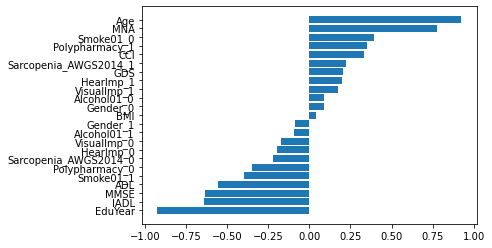

In [8]:
svm_all_auroc = []
avg_coef = []
inx = 0
print('MTAgroup01vs23 SVM--')
for train_index, test_index in KFold(n_splits=3, random_state=42, shuffle=True).split(X_data_one_hot):
    X_train, X_test = X_data_one_hot.iloc[train_index], X_data_one_hot.iloc[test_index]
    y_train, y_test = y2_data.iloc[train_index], y2_data.iloc[test_index]
    # scaling
    scaler = preprocessing.MinMaxScaler()
    #scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # model
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    auroc = auc(fpr, tpr)
    print('auc', auroc)
    svm_all_auroc.append(auroc)
    if inx == 0:
        avg_coef = model.coef_[0]
    else:
        avg_coef = np.mean(np.array([ model.coef_[0], avg_coef ]), axis=0)
    inx = inx+1
print('auc_mean: %.2f, auc_std: %.2f' %(np.mean(svm_all_auroc), np.std(svm_all_auroc)))
f_importances(avg_coef, feature_names)

GCAgroup12 SVM--
auc 0.6439393939393939
auc 0.6977777777777777
auc 0.8269230769230769
auc_mean: 0.72, auc_std: 0.08


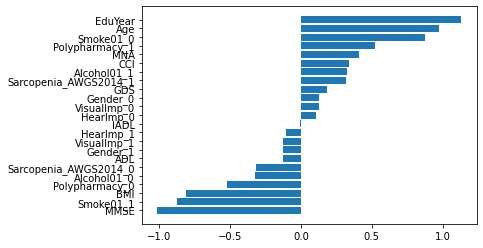

In [9]:
svm_all_auroc = []
avg_coef = []
inx = 0
print('GCAgroup12 SVM--')
for train_index, test_index in KFold(n_splits=3, random_state=42, shuffle=True).split(X_data_one_hot):
    X_train, X_test = X_data_one_hot.iloc[train_index], X_data_one_hot.iloc[test_index]
    y_train, y_test = y3_data.iloc[train_index], y3_data.iloc[test_index]
    # scaling
    scaler = preprocessing.MinMaxScaler()
    #scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # model
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    auroc = auc(fpr, tpr)
    print('auc', auroc)
    svm_all_auroc.append(auroc)
    if inx == 0:
        avg_coef = model.coef_[0]
    else:
        avg_coef = np.mean(np.array([ model.coef_[0], avg_coef ]), axis=0)
    inx = inx+1
print('auc_mean: %.2f, auc_std: %.2f' %(np.mean(svm_all_auroc), np.std(svm_all_auroc)))
f_importances(avg_coef, feature_names)